In [1]:
import pandas as pd 
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn import linear_model
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [4]:
data = pd.read_csv('data_sckit.csv')
conditions = [(data['Tot_RUL'] <= 100000),
    (data['Tot_RUL'] >= 100000)]
choices = [0.0, 1.0]
data["label"] = np.select(conditions, choices, default=0)
data.head()

,timestamp,MT,Lag_error,AP,As,pAp,pAs,ple,vax,mode,sample,cycle,RUL,tot_cycle,Tot_RUL,Actual_Force,Film_Force,label
0,0.008,0.670726,-0.050846,939333465,-6674.194336,409999463,12294.263672,1.043955,2699.999512,0,0.0,1,2047,1,204799,0.000000,0.000000,1.0
1,0.012,0.456506,0.003138,939333438,-6794.356934,409999513,12269.095703,1.066463,2699.999512,0,0.0,2,2046,2,204798,-30040.649415,-6291.992188,1.0
2,0.016,0.520841,0.005510,939333411,-6749.725098,409999562,12261.545898,1.120736,2699.999512,0,0.0,3,2045,3,204797,11157.958985,-1887.451172,1.0
3,0.020,0.568736,-0.028143,939333384,-6780.624023,409999611,12286.712891,1.180041,2699.999512,0,0.0,4,2044,4,204796,-7724.731445,6291.748047,1.0
4,0.024,0.576378,-0.028126,939333357,-6763.458008,409999661,12281.679688,1.163287,2699.999512,0,0.0,5,2043,5,204795,4291.503905,-1258.300780,1.0


In [5]:
data.describe()

,timestamp,MT,Lag_error,AP,As,pAp,pAs,ple,vax,mode,sample,cycle,RUL,tot_cycle,Tot_RUL,Actual_Force,Film_Force,label
count,782306.000000,782306.000000,782306.000000,7.823060e+05,782306.000000,7.823060e+05,782306.000000,782306.000000,782306.000000,782306.000000,782306.000000,782306.000000,782306.000000,782306.000000,782306.000000,7.823060e+05,7.823060e+05,782306.000000
mean,4.101897,-0.119269,-0.000053,3.619472e+08,1925.334763,1.530814e+08,5318.619996,0.984754,1911.794051,2.128162,260.223329,1024.461307,1023.538693,73017.075389,125275.109613,2.946944e+00,-3.109304e+00,0.669808
std,2.364741,0.602265,0.119913,5.380236e+08,4839.522331,2.795530e+08,3347.237922,0.338752,649.413801,1.513144,152.450297,591.185296,591.185296,44464.809171,47578.403638,4.987449e+04,3.256259e+04,0.470282
min,0.004000,-6.560303,-1.830604,-2.039056e+09,-9482.574219,1.936250e+05,-20.133852,-0.914366,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,8222.000000,-5.351543e+06,-3.656820e+06,0.000000
25%,2.052000,-0.367555,-0.021902,8.727540e+07,-1915.740967,2.009844e+07,3032.668701,0.840285,1499.999756,1.000000,130.000000,512.000000,512.000000,32978.000000,87454.000000,-1.287457e+04,-8.808472e+03,0.000000
50%,4.100000,-0.118632,0.000628,1.965339e+08,2568.054199,7.199693e+07,4577.945312,0.971593,1799.999756,2.000000,261.000000,1024.000000,1024.000000,72093.000000,126569.000000,-2.574951e+03,-6.291504e+02,1.000000
75%,6.148000,0.254345,0.023637,6.043222e+08,5410.766602,1.656422e+08,5740.678223,1.105286,2039.999634,3.000000,388.000000,1536.000000,1536.000000,111208.000000,165684.000000,1.373291e+04,8.179443e+03,1.000000
max,8.199999,3.856873,2.021531,1.909651e+09,17921.447266,1.453671e+09,17972.023438,3.486419,3599.999512,5.000000,518.000000,2048.000000,2047.000000,157696.000000,204799.000000,4.326725e+06,3.585722e+06,1.000000


In [6]:
features =['MT', 'Lag_error', 'AP', 'As', 'pAp', 'pAs', 'ple', 'vax',"RUL","Tot_RUL","cycle","tot_cycle",'Actual_Force','Film_Force']

In [7]:
data[features].corrwith(data.timestamp).sort_values(ascending=False)

cycle           1.000000
tot_cycle       0.013374
As              0.005420
pAp             0.000060
AP              0.000041
Lag_error      -0.000106
Film_Force     -0.000122
Actual_Force   -0.001119
MT             -0.003011
ple            -0.003029
pAs            -0.003633
vax            -0.005755
Tot_RUL        -0.012277
RUL            -1.000000
dtype: float64

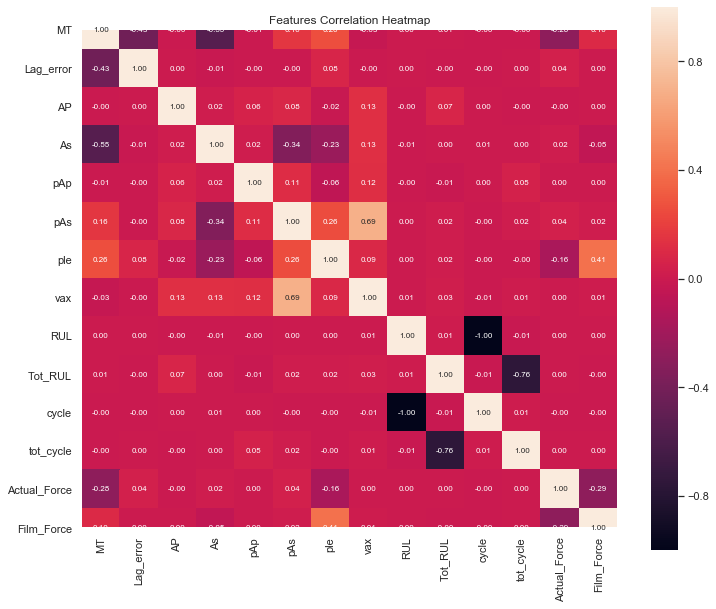

In [8]:
import seaborn as sns
cm = np.corrcoef(data[features].values.T)
sns.set(font_scale=1.0)
fig = plt.figure(figsize=(12, 10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=features, xticklabels=features)
plt.title('Features Correlation Heatmap')
plt.show()

In [9]:
def explore_col(s, e):
    
    """Plot 4 main graphs for a single feature.
    
        plot1: histogram 
        plot2: boxplot 
        plot3: line plot (time series over cycle)
        plot4: scatter plot vs. regression label ttf
        
    Args:
        s (str): The column name of the feature to be plotted.
        e (int): The number of random mode to be plotted for plot 3. Range from 1 -8 (becuase we have only 8 mode)

    Returns:
        plots
    
    """
    
    fig = plt.figure(figsize=(10, 8))
    sub1 = fig.add_subplot(221) 
    sub1.set_title(s +' histogram') 
    sub1.hist(data[s])

    sub2 = fig.add_subplot(222)
    sub2.set_title(s +' boxplot')
    sub2.boxplot(data[s])
    
    if e > 9 or e <= 0:
        select_mode = list(pd.unique(data.mode))
    else:
        select_mode = np.random.choice(range(0,9), e, replace=False)
        
    sub3 = fig.add_subplot(223)
    sub3.set_title('time series: ' + s +' / cycle')
    sub3.set_xlabel('cycle')
    for i in select_mode:
        df = data[['tot_cycle', s]][data["mode"] == i]
        sub3.plot(df['tot_cycle'],df[s])
        
    sub4 = fig.add_subplot(224)
    sub4.set_title("scatter: "+ s + " / RUL (regr label)")
    sub4.set_xlabel('Tot_RUL')
    sub4.scatter(data['Tot_RUL'],data[s])


    plt.tight_layout()
    plt.show()


def plot_time_series(s):
    
    """Plot time series of a single sensor for 10 random sample engines.
    
        Args:
        s (str): The column name of the sensor to be plotted.

    Returns:
        plots
        
    """
    
    fig, axes = plt.subplots(5, 1, sharex=True, figsize = (15, 15))
    fig.suptitle(s + ' time series / cycle', fontsize=15)
    
    #np.random.seed(12345)
    select_engines = np.random.choice(range(1,9), 5, replace=False).tolist()
    
    for e_id in select_engines:
        df = data[['tot_cycle', s]][data["mode"]== e_id]
        i = select_engines.index(e_id)
        axes[i].plot(df['tot_cycle'],df[s])
        axes[i].set_ylabel('mode ' + str(e_id))
        axes[i].set_xlabel('cycle')
        #axes[i].set_title('engine ' + str(e_id), loc='right')

    #plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

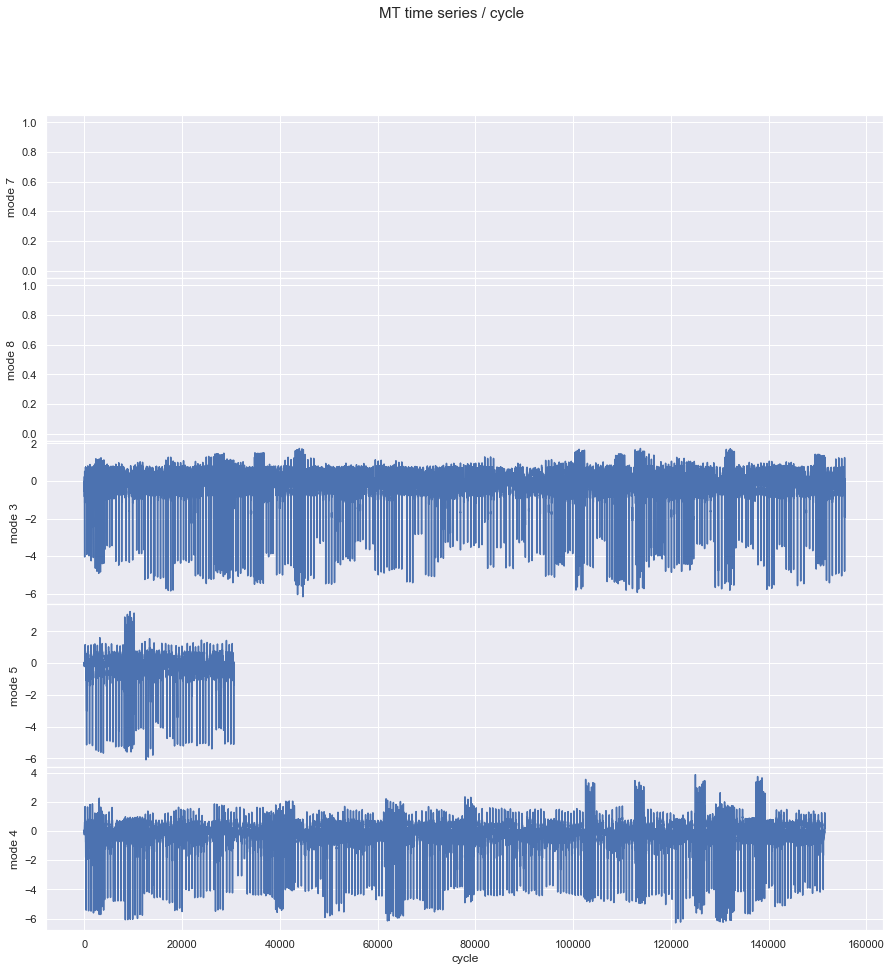

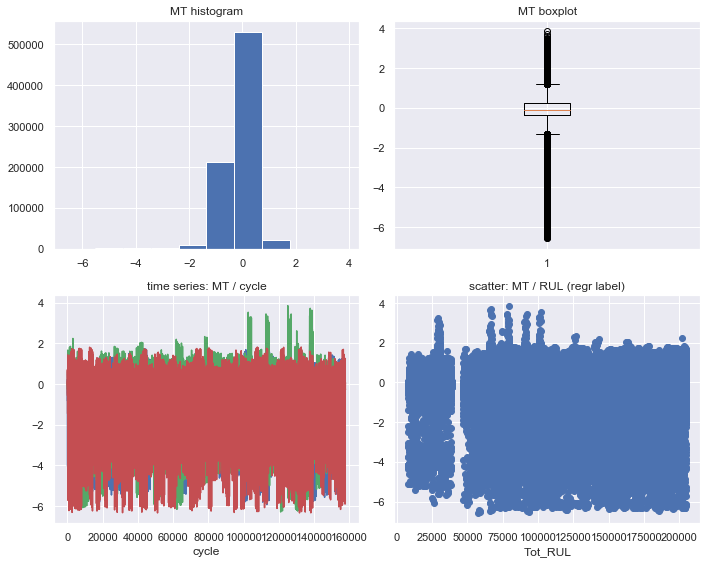

In [10]:
plot_time_series('MT')
explore_col("MT",4)

In [ ]:
data = data.drop(["RUL","Tot_RUL","cycle","tot_cycle"],axis = 1)

In [35]:
for i in data:
    
    minimum = data[i].min()
    maximum = data[i].max()
    df[i] = (data[i] - minimum) / (maximum - minimum)
    
df

,timestamp,MT,Lag_error,AP,As,pAp,pAs,ple,vax,mode,sample,Actual_Force,Film_Force,label
0,0.000488,0.694145,0.462019,0.75427,0.102481,0.281949,0.684431,0.444994,0.750000,0.0,0.000000,0.552944,0.504908,1.0
1,0.000976,0.673581,0.476032,0.75427,0.098096,0.281949,0.683033,0.450108,0.750000,0.0,0.000000,0.549840,0.504040,1.0
2,0.001464,0.679757,0.476648,0.75427,0.099724,0.281949,0.682613,0.462441,0.750000,0.0,0.000000,0.554097,0.504648,1.0
3,0.001952,0.684354,0.467912,0.75427,0.098597,0.281949,0.684012,0.475917,0.750000,0.0,0.000000,0.552146,0.505777,1.0
4,0.002440,0.685088,0.467917,0.75427,0.099223,0.281949,0.683732,0.472110,0.750000,0.0,0.000000,0.553388,0.504735,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782301,0.982918,0.614770,0.478393,0.52383,0.442496,0.052051,0.141558,0.377032,0.416667,1.0,0.988417,0.551880,0.503866,0.0
782302,0.983407,0.612658,0.475838,0.52383,0.440867,0.052051,0.141278,0.379213,0.416667,1.0,0.988417,0.551791,0.504735,0.0
782303,0.983895,0.612210,0.479058,0.52383,0.439364,0.052051,0.141278,0.394162,0.416667,1.0,0.988417,0.551880,0.504908,0.0
782304,0.984383,0.617467,0.475842,0.52383,0.438988,0.052051,0.140719,0.392682,0.416667,1.0,0.988417,0.552678,0.504561,0.0


In [36]:
import matplotlib.pyplot as plt

def line_plot(y, log=False):

    x = "timestamp"
    x1 = df[x].loc[df['label'] == 0]
    y1 = df[y].loc[df['label'] == 0]

    x2 = df[x].loc[df['label'] == 1]
    y2 = df[y].loc[df['label'] == 1]
    
    plt.plot(x1, y1, label= y + "_New") 
    plt.plot(x2, y2, label= y + "_Old")
    
    if log:
        plt.yscale('log')
    plt.legend(loc='lower left')
    plt.show()

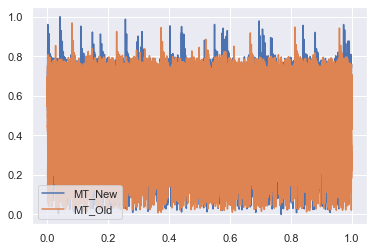

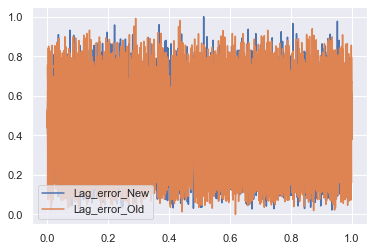

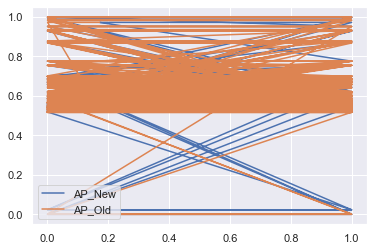

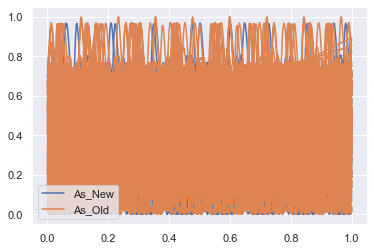

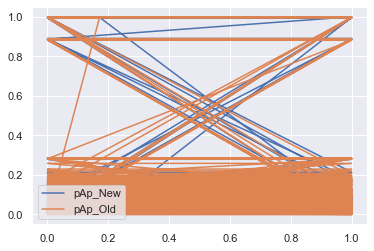

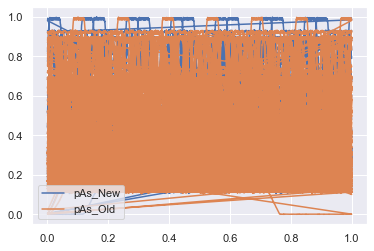

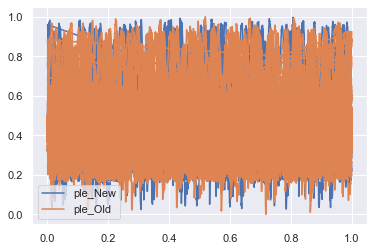

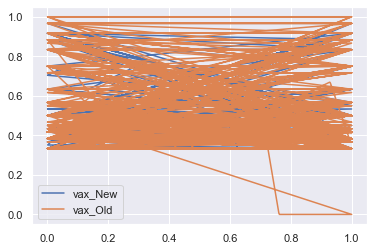

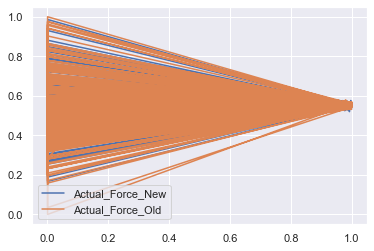

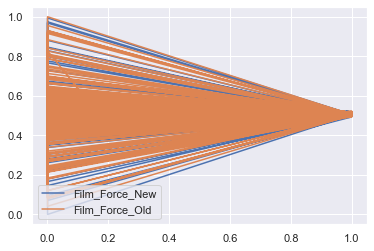

In [37]:
feature =['MT', 'Lag_error', 'AP', 'As', 'pAp', 'pAs', 'ple', 'vax','Actual_Force','Film_Force']

for i in feature:
    line_plot(i)

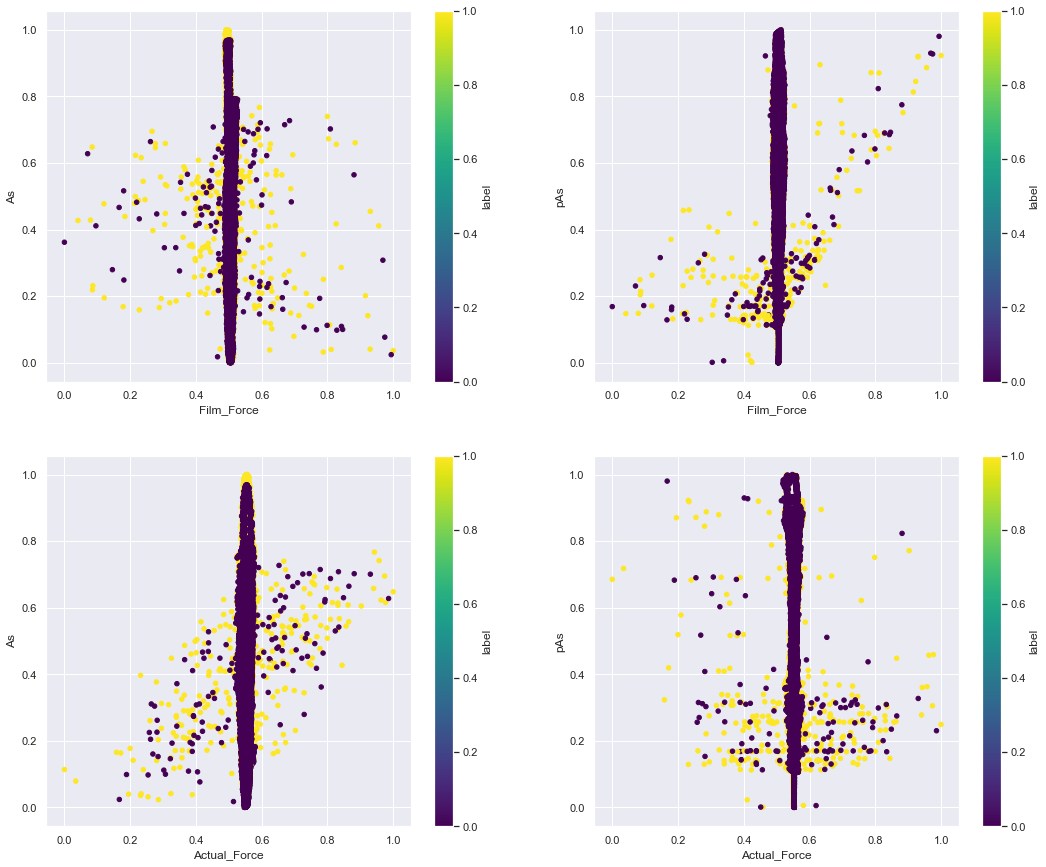

In [38]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

figure.set_size_inches(18, 15)

df.plot.scatter(x = 'Film_Force', y = 'As', c = 'label', colormap = 'viridis', ax=ax1)
df.plot.scatter(x = 'Film_Force', y = 'pAs', c = 'label', colormap = 'viridis', ax=ax2)
df.plot.scatter(x = 'Actual_Force', y = 'As', c = 'label', colormap = 'viridis', ax=ax3)
df.plot.scatter(x = 'Actual_Force', y = 'pAs', c = 'label', colormap = 'viridis', ax=ax4)

### Creating  a Linear Regression Model and comparing with the statmodel

In [12]:
y = np.array(data['label'])
x = data.drop('label', axis=1).values
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 1000, random_state=10000)
# Target distribution (count values)
print("Label distribution - 1 worn; 0 unworn:")
print(data['label'].value_counts())

Label distribution - 1 worn; 0 unworn:
1.0    523995
0.0    258311
Name: label, dtype: int64


In [13]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_score = model.predict(x_test)
print("Trained on {0} observations and scoring with {1} test samples.".format(len(x_train), len(x_test)))
print("Accuracy: {0:0.4f}".format(accuracy_score(y_test, y_score)))
print("F1 Score: {0:0.4f}".format(f1_score(y_test, y_score)))
print("Area under ROC curve: {0:0.4f}".format(roc_auc_score(y_test, y_score)))
# Feature importances
features = [(data.columns[i], v) for i,v in enumerate(model.feature_importances_)]
features.sort(key=lambda x: x[1], reverse = True)
for item in features[:10]:
    print("{0}: {1:0.4f}".format(item[0], item[1]))

Trained on 1000 observations and scoring with 781306 test samples.
Accuracy: 0.8235
F1 Score: 0.8687
Area under ROC curve: 0.7987
AP: 0.2329
pAp: 0.2019
vax: 0.0982
sample: 0.0967
mode: 0.0870
Film_Force: 0.0595
Lag_error: 0.0409
ple: 0.0387
MT: 0.0378
timestamp: 0.0367


In [14]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
y_score=log_reg.predict(x_test)
print("Trained on {0} observations and scoring with {1} test samples.".format(len(x_train), len(x_test)))
print("Accuracy: {0:0.4f}".format(accuracy_score(y_test, y_score)))
print("F1 Score: {0:0.4f}".format(f1_score(y_test, y_score)))
print("Area under ROC curve: {0:0.4f}".format(roc_auc_score(y_test, y_score)))
acc_log_reg=round(log_reg.score(x_train,y_train)*100,2)
acc_log_reg

Trained on 1000 observations and scoring with 781306 test samples.
Accuracy: 0.6750
F1 Score: 0.8035
Area under ROC curve: 0.5119


69.3

In [16]:
from sklearn.linear_model import LinearRegression
my_model = LinearRegression()
my_model.fit(x_train, y_train)
my_model.score(x_train,y_train)

0.055049379084992967

In [17]:
import numpy as np

class MyLinearModel:

    def __init__(self):
        # Initialize!
        self.coefficients = None
        self.standard_errors = None
        self.r_squared = None

    def fit(self, X, y):
        # Fit the model using regressors X and outcomes y
        X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
        X_transposed = np.transpose(X)
        self.coefficients = np.linalg.inv(X_transposed @ X) @ (X_transposed @ y)

        # Get Standard errors
        errors = (y - X @ self.coefficients)
        errors_squared = (errors @ np.transpose(errors))
        errors_times_coefficients_sq_inv = errors_squared * np.linalg.inv(X_transposed @ X)
        self.standard_errors = np.sqrt(np.diagonal(errors_times_coefficients_sq_inv))

        # Get Rsquared
        self.r_squared = 1 - np.sum(errors_squared) / np.sum( (y - np.mean(y))**2 )

    def predict(self, X_test):
        # Return predicted values.
        X_test = np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=1)
        return X_test @ self.coefficients

In [20]:
my_mod = MyLinearModel()
my_mod.fit(x_train, y_train)
y_test = my_mod.predict(x_train)
my_mod.r_squared

0.05504937908499308

In [19]:
import pandas as pd
import statsmodels.formula.api as smf
{'y': y_train, 'x': x_train}
df_model = smf.ols('y ~ x', data).fit()
df_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     3336.
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        09:24:10   Log-Likelihood:            -4.9875e+05
No. Observations:              782306   AIC:                         9.975e+05
Df Residuals:                  782292   BIC:                         9.977e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6418      0.003    226.310      0.000       0.636       0.647
x[0]          -0.0014      0.000     -6.274      0.000      -0.002      -0.001
x[1]           0.0030      0.001      2.235      0.025       0.000       0.006
x[2]          -0.0133      0.005     -2.541      0.011      -0.024      -0.003
x[3]        3.872e-11   1.07e-12     36.226      0.000    3.66e-11    4.08e-11
x[4]        4.946e-08   1.68e-07      0.295      0.768    -2.8e-07    3.78e-07
x[5]       -1.993e-10   1.97e-12   -100.935      0.000   -2.03e-10   -1.95e-10
x[6]       -5.128e-06   2.77e-07    -18.519      0.000   -5.67e-06   -4.59e-06
x[7]           0.0828      0.002     44.441      0.000       0.079       0.086
x[8]       -2.181e-05   1.33e-06    -16.432      0.000   -2.44e-05   -1.92e-05
x[9]          -0.3274      0.002   -171.951      0.000      -0.331      -0.324
x[10]          0.0028   1.89e-05    149.404      0.000       0.003       0.003
x[11]       5.349e-08   1.16e-08      4.631      0.000    3.09e-08    7.61e-08
x[12]      -3.232e-07   1.82e-08    -17.798      0.000   -3.59e-07   -2.88e-07
==============================================================================
Omnibus:                  3091772.085   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           116742.997
Skew:                          -0.688   Prob(JB):                         0.00
Kurtosis:                       1.700   Cond. No.                     6.78e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.78e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### R squared error is same of my linear model vs the statmodel